In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

### The equilibria 

In [2]:
x, y = sympy.symbols('x, y')

In [3]:
eq1 = x + y + 1
eq2 = y + sympy.sqrt(1 + 2 * x**2)

In [4]:
equilibria = sympy.solve([eq1, eq2], [x, y])
equilibria

[(0, -1), (2, -3)]

### Make variable replacement

In [5]:
e1, e2 = sympy.symbols('e1, e2')

In [6]:
eq1_point1 = eq1.subs(x, e1 + equilibria[0][0]).subs(y, e2 + equilibria[0][1])
eq2_point1 = eq2.subs(x, e1 + equilibria[0][0]).subs(y, e2 + equilibria[0][1])

In [7]:
eq1_point1, eq2_point1

(e1 + e2, e2 + sqrt(2*e1**2 + 1) - 1)

In [8]:
eq1_point2 = eq1.subs(x, e1 + equilibria[1][0]).subs(y, e2 + equilibria[1][1])
eq2_point2 = eq2.subs(x, e1 + equilibria[1][0]).subs(y, e2 + equilibria[1][1])

In [9]:
eq1_point2, eq2_point2

(e1 + e2, e2 + sqrt(2*(e1 + 2)**2 + 1) - 3)

### Point №1

In [10]:
leq1_point1 = eq1_point1.subs(e1, 0).subs(e2, 0) + eq1_point1.diff(e1).subs(e1, 0).subs(e2, 0) * (e1 - 0) + eq1_point1.diff(e2).subs(e1, 0).subs(e2, 0) * (e2 - 0)
leq2_point1 = eq2_point1.subs(e1, 0).subs(e2, 0) + eq2_point1.diff(e1).subs(e1, 0).subs(e2, 0) * (e1 - 0) + eq2_point1.diff(e2).subs(e1, 0).subs(e2, 0) * (e2 - 0)

In [11]:
leq1_point1, leq2_point1

(e1 + e2, e2)

In [12]:
A1, _ = sympy.linear_eq_to_matrix([sympy.expand(sympy.Eq(leq1_point1, 0)), 
                                  sympy.expand(sympy.Eq(leq2_point1, 0))], [e1, e2])

In [13]:
A1

Matrix([
[1, 1],
[0, 1]])

In [14]:
A1.eigenvects()

[(1,
  2,
  [Matrix([
   [1],
   [0]])])]

### Point №2 

In [15]:
leq1_point2 = eq1_point2.subs(e1, 0).subs(e2, 0) + eq1_point2.diff(e1).subs(e1, 0).subs(e2, 0) * (e1 - 0) + eq1_point2.diff(e2).subs(e1, 0).subs(e2, 0) * (e2 - 0)
leq2_point2 = eq2_point2.subs(e1, 0).subs(e2, 0) + eq2_point2.diff(e1).subs(e1, 0).subs(e2, 0) * (e1 - 0) + eq2_point2.diff(e2).subs(e1, 0).subs(e2, 0) * (e2 - 0)

In [16]:
leq1_point2, leq2_point2

(e1 + e2, 4*e1/3 + e2)

In [17]:
A2, _ = sympy.linear_eq_to_matrix([sympy.expand(sympy.Eq(leq1_point2, 0)), 
                                  sympy.expand(sympy.Eq(leq2_point2, 0))], [e1, e2])

In [18]:
A2

Matrix([
[  1, 1],
[4/3, 1]])

In [19]:
A2.eigenvects()


[(1 - 2*sqrt(3)/3,
  1,
  [Matrix([
   [-sqrt(3)/2],
   [         1]])]),
 (1 + 2*sqrt(3)/3,
  1,
  [Matrix([
   [sqrt(3)/2],
   [        1]])])]

### Ploting trajectories and direction fields

In [20]:
def f(xy, t=0):
    x, y = xy
    return [x + y + 1, 
            y + np.sqrt(1 + 2 * x**2)]

Text(0.5, 1.0, 'Фазові криві')

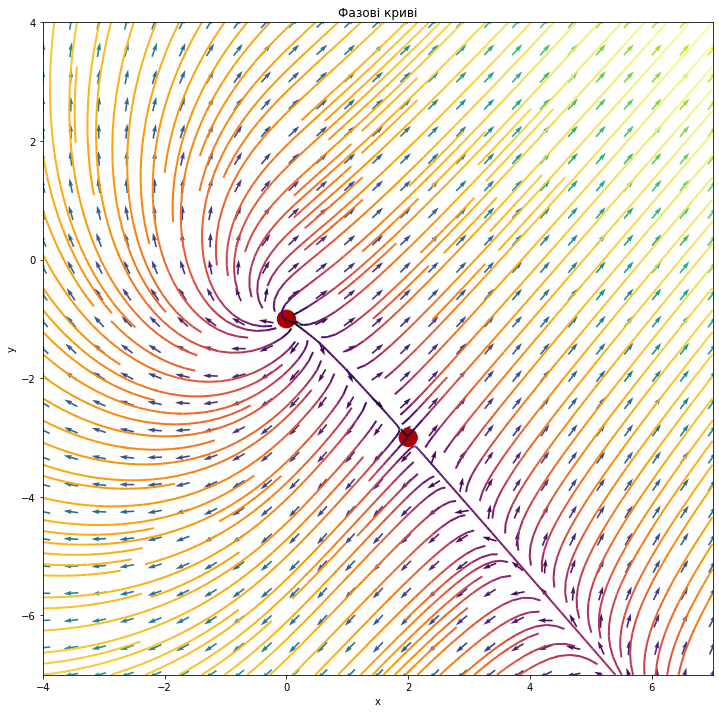

In [21]:
x_min, x_max = -4, 7
y_min, y_max = -7, 4

xx = np.linspace(x_min, x_max, 25)
yy = np.linspace(y_min, y_max, 25)

X, Y = np.meshgrid(xx, yy)
DX, DY = f([X, Y])

M = (np.hypot(DX, DY))
M[ M == 0] = 1.

NDX = DX / M
NDY = DY / M

fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.quiver(X, Y, NDX, NDY, M, pivot='mid')

color = 2 * np.log(np.hypot(DX, DY))
ax.streamplot(X, Y, DX, DY, color=color, linewidth=2, cmap=plt.cm.inferno,
               density=2, arrowstyle='-', arrowsize=1.5)

ax.add_artist(Circle((0, -1), 0.15, color='#aa0000'))
ax.add_artist(Circle((2, -3), 0.15, color='#aa0000'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Фазові криві')

<ipython-input-22-f8c1b934b7d6>:19: RuntimeWarning: divide by zero encountered in log
  color = 2 * np.log(np.hypot(DX, DY))
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/svnext/Documents/PhasePortrait/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Фазові криві в околі точки (0, -1)')

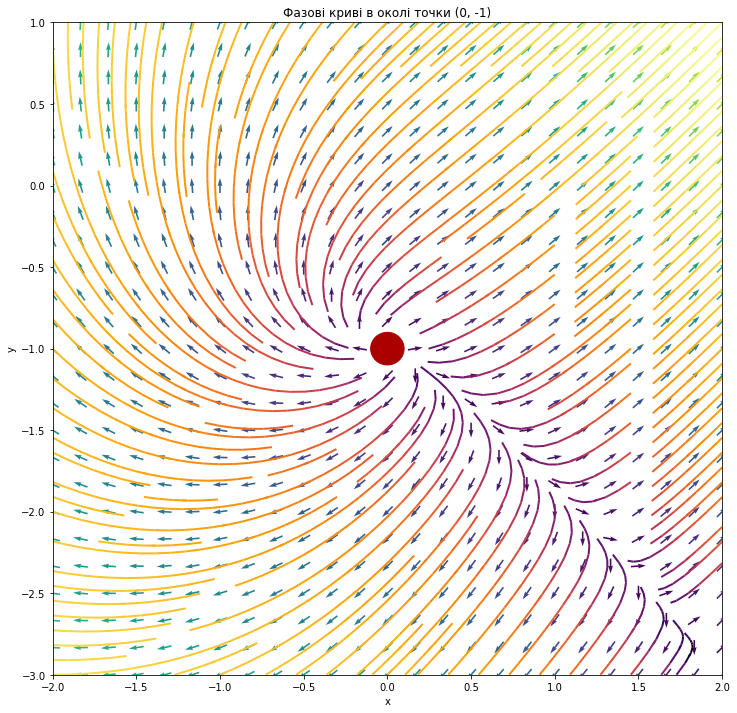

In [22]:
x_min, x_max = -2, 2
y_min, y_max = -3, 1

xx = np.linspace(x_min, x_max, 25)
yy = np.linspace(y_min, y_max, 25)

X, Y = np.meshgrid(xx, yy)
DX, DY = f([X, Y])

M = (np.hypot(DX, DY))
M[ M == 0] = 1.

NDX = DX / M
NDY = DY / M

fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.quiver(X, Y, NDX, NDY, M, pivot='mid')

color = 2 * np.log(np.hypot(DX, DY))
ax.streamplot(X, Y, DX, DY, color=color, linewidth=2, cmap=plt.cm.inferno,
               density=1.5, arrowstyle='-', arrowsize=1.5)

ax.add_artist(Circle((0, -1), 0.1, color='#aa0000'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Фазові криві в околі точки (0, -1)')

<ipython-input-23-ecfe2aa3f787>:19: RuntimeWarning: divide by zero encountered in log
  color = 2 * np.log(np.hypot(DX, DY))


Text(0.5, 1.0, 'Фазові криві в околі точки (2, 3)')

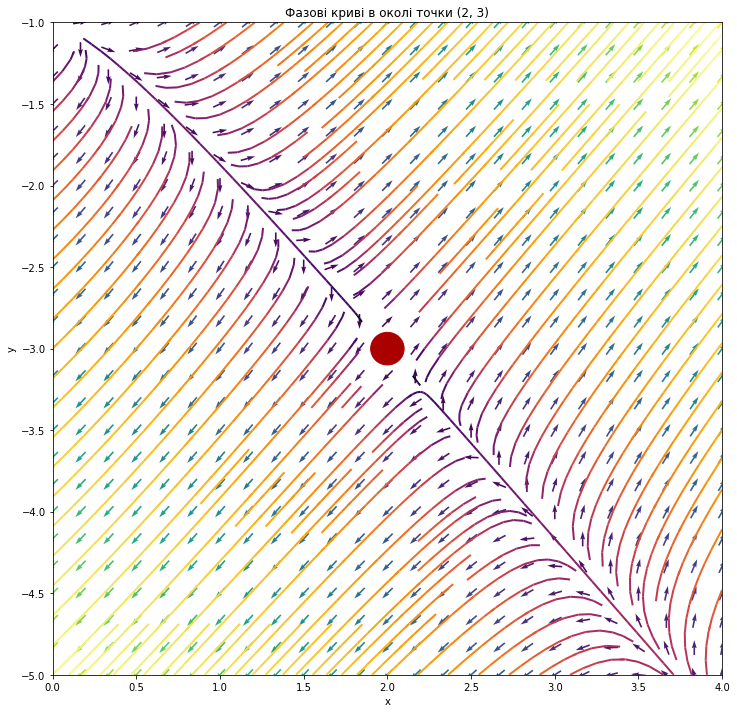

In [23]:
x_min, x_max = 0, 4
y_min, y_max = -5, -1

xx = np.linspace(x_min, x_max, 25)
yy = np.linspace(y_min, y_max, 25)

X, Y = np.meshgrid(xx, yy)
DX, DY = f([X, Y])

M = (np.hypot(DX, DY))
M[ M == 0] = 1.

NDX = DX / M
NDY = DY / M

fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.quiver(X, Y, NDX, NDY, M, pivot='mid')

color = 2 * np.log(np.hypot(DX, DY))
ax.streamplot(X, Y, DX, DY, color=color, linewidth=2, cmap=plt.cm.inferno,
               density=1.5, arrowstyle='-', arrowsize=1.5)

ax.add_artist(Circle((2, -3), 0.1, color='#aa0000'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Фазові криві в околі точки (2, 3)')